In [16]:
from __future__ import print_function, unicode_literals, absolute_import, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
from tifffile import imread
from csbdeep.utils import Path, download_and_extract_zip_file, plot_some, axes_dict, plot_history
from csbdeep.io import save_tiff_imagej_compatible, load_training_data
from csbdeep.models import CARE, Config
from csbdeep.data import RawData, create_patches, create_patches_reduced_target
from csbdeep.internals.train import prepare_model
import shutil 
import os

from vtk_to_tiff_py import save_imagej_tiff4d, save_imagej_tiff

# données

date = "070418a"
dir_dataDivisions = "C:/Users/bioAMD/Desktop/Nathan/Tracking/dataDivisions"

def fetch_rawdata(dir_data):
    raw_data = RawData.from_folder (
        basepath = dir_data + "/train",
        source_dirs = [dir_data + "/train/train_samples"],
        target_dir = dir_data + "/train/train_labels",
        axes = "ZCYX" )
    
    return raw_data

date = "070418a"
dir_dataDivisions = "C:/Users/bioAMD/Desktop/Nathan/Tracking/dataDivisions"

rawdata = fetch_rawdata(dir_dataDivisions+'/augmentation')  

In [ ]:
save_file_dir = dir_dataDivisions+"/augmentation/my_training_data.npz"
nb_forward = 2

import csbdeep.data as csbd

# création des patches
X, Y, XY_axes = create_patches_reduced_target(
    reduction_axes      = "C",
    target_axes         = "ZYX",
    raw_data            = rawdata,
    patch_size          = (32,2*nb_forward+1,64,64),
    n_patches_per_image = 1,
    save_file           = save_file_dir,
    patch_filter        = None,
    #transforms           =  [csbd.transform.anisotropic_distortions(subsample=1, psf=None, psf_axes = None, poisson_noise = False,
    #                                              gauss_sigma    = 0.1, subsample_axis = 'X', yield_target = 'target',
    #                                          crop_threshold = 0.2 )]
    #transforms = [, csbd.permute_axes("ZCXY")]
)

In [ ]:
n_patches = 22260
print( 2*n_patches*(32*5*64*64)*4 *1e-9, "Gb nécessaires")
print(X.shape)

In [21]:
dir_dataDivisions = "C:/Users/bioAMD/Desktop/Nathan/Tracking/dataDivisions"
data_path = dir_dataDivisions+"/augmentation/my_training_data.npz"
(X,Y), (X_val,Y_val), axes = load_training_data(data_path, validation_split=0.1, 
                                                 verbose=True)
                                   
for i in range(len(X[:,0,0,0,0])) :
    X[i] = ( X[i] - np.min(X[i]) )/( np.max(X[i]) - np.min(X[i]) )
    Y[i] = ( Y[i] - np.min(Y[i]) )/( np.max(Y[i]) - np.min(Y[i]) )
for i in range(len(X_val[:,0,0,0,0])) :
    X_val[i] = ( X_val[i] - np.min(X_val[i]) )/( np.max(X_val[i]) - np.min(X_val[i]) )
    Y_val[i] = ( Y_val[i] - np.min(Y_val[i]) )/( np.max(Y_val[i]) - np.min(Y_val[i]) )

c = axes_dict(axes)['C']
n_channel_in, n_channel_out = X.shape[c], Y.shape[c]
config = Config(axes, n_channel_in, n_channel_out, train_batch_size=16, train_loss='mae_custom')

KeyboardInterrupt: 

In [4]:
ind = 7
model = CARE(None, 'modele_divisions'+str(ind))
#model.prepare_for_training(None, loss='mae_custom')


%load_ext tensorboard
%tensorboard --logdir { "C:/Users/bioAMD/Desktop/Nathan" }
history = model.train(X,Y, validation_data = (X_val, Y_val), train_epochs=50)

savehist_path = "C:/Users/bioAMD/Desktop/Nathan/Tracking/trainHistoryDict" + str(ind) + ".txt"
epoch = np.arange(start=1, stop=len(history.history["loss"])+1, step=1 )

if os.path.exists(savehist_path) :
    os.remove(savehist_path)
with open(savehist_path, 'a') as file_pi:
    file_pi.write("# epoch loss mse mae val_loss val_mse val_mae \n")
    for i in range(len(history.history["loss"])) :
        file_pi.write(str(epoch[i]) + " ")
        file_pi.write(str(history.history["loss"][i]) + " ")
        file_pi.write(str(history.history["mse"][i]) + " ")
        file_pi.write(str(history.history["mae"][i]) + " ")
        file_pi.write(str(history.history["val_loss"][i]) + " ")
        file_pi.write(str(history.history["val_mse"][i]) + " ")
        file_pi.write(str(history.history["val_mae"][i]) + "\n")

#ind += 1 # pour séparer les history de deux entrainements

Loading network weights from 'weights_best.h5'.
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 46816), started 1 day, 14:11:31 ago. (Use '!kill 46816' to kill it.)

Epoch 1/100
Cause: could not parse the source code of <function _mean_or_not.<locals>.<lambda> at 0x0000014473EA5700>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names.
Match 0:
lambda x: K.mean(x, axis=-1)

Match 1:
lambda x: x

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function _mean_or_not.<locals>.<lambda> at 0x0000014473EA5700>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names.
Match 0:
lambda x: K.mean(x, axis=-1)

Match 1:
lambda x: x

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function _mean_or_not.<locals>.<lambda> at 0x0000014473EA5E50>: found multiple defi

400/400 [==============================] - 217s 543ms/step - loss: 2.2235e-04 - mse: 8.5580e-05 - mae: 4.8788e-04 - val_loss: 4.9386e-04 - val_mse: 1.7651e-04 - val_mae: 7.9586e-04

Epoch 00024: ReduceLROnPlateau reducing learning rate to 0.00019999999494757503.
Epoch 25/100
400/400 [==============================] - 217s 543ms/step - loss: 2.0620e-04 - mse: 8.4206e-05 - mae: 4.3771e-04 - val_loss: 4.7924e-04 - val_mse: 1.6541e-04 - val_mae: 7.8300e-04
Epoch 26/100
400/400 [==============================] - 218s 545ms/step - loss: 1.9071e-04 - mse: 7.5446e-05 - mae: 3.9829e-04 - val_loss: 4.8411e-04 - val_mse: 1.5981e-04 - val_mae: 7.2122e-04
Epoch 27/100
400/400 [==============================] - 217s 543ms/step - loss: 1.9949e-04 - mse: 7.7728e-05 - mae: 3.9546e-04 - val_loss: 4.7852e-04 - val_mse: 1.6389e-04 - val_mae: 7.5048e-04
Epoch 28/100
400/400 [==============================] - 218s 544ms/step - loss: 1.8041e-04 - mse: 7.0025e-05 - mae: 3.5775e-04 - val_loss: 4.8445e-04 - val

In [33]:
epoch2 = np.arange(101,151,1)
val_loss2 = np.array([4.98, 5.066, 5.03, 4.99, 5.012, 4.97, 4.936, 5.026, 4.698, 5.03, 4.969, 5.01, 4.898, 5.02,4.995, 4.993, 4.93,
           5.03,4.954,4.949, 4.99, 4.947,4.9386, 4.9386, 4.792, 4.841,4.7852,4.844,4.80,4.84,4.85, 4.87, 4.794, 4.825, 4.877,
           4.8, 4.82, 4.81, 4.768, 4.826, 4.801, 4.787, 4.854, 4.83, 4.82, 4.795, 4.8382, 4.80, 4.829, 4.8196 ])
loss2 = np.array([2.09, 2.25, 2.379, 2.48, 2.475, 2.35, 2.41,2.333, 2.37, 2.38, 2.33, 2.311, 2.34,2.29,2.31,2.41,2.235, 2.229,
       2.281, 2.416, 2.35, 2.22, 2.184, 2.22, 2.06, 1.90, 1.99, 1.8, 1.82, 1.81, 1.796, 1.79, 1.78, 1.81, 1.72, 1.775, 1.76,
       1.66, 1.718, 1.59, 1.60, 1.61, 1.547, 1.577, 1.582, 1.5738, 1.512, 1.552, 1.584, 1.5])

In [32]:
print(len(epoch2))

51


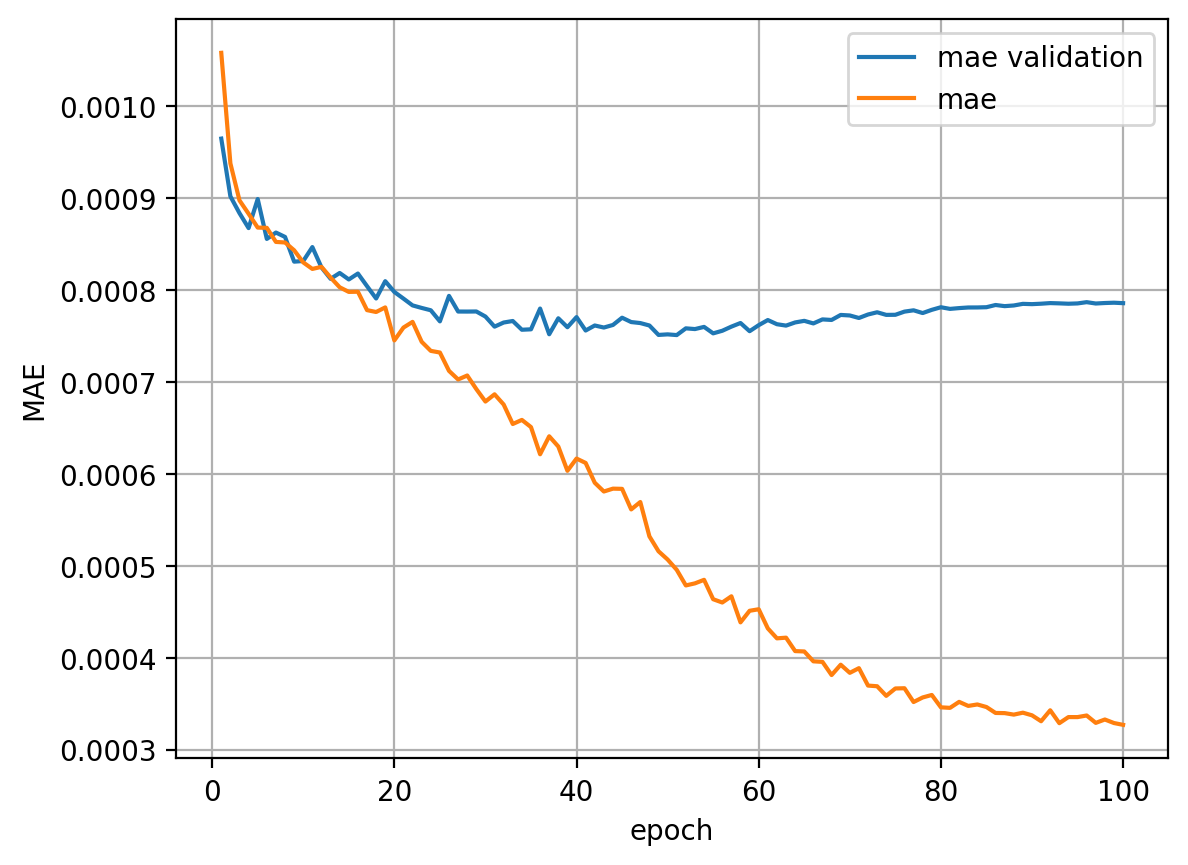

In [43]:
data = np.genfromtxt('C:/Users/bioAMD/Desktop/Nathan/Tracking/trainHistoryDict6.txt', skip_header=1)

# epoch1, loss1, val_loss1 = data[:,0], data[:,1], data[:,4]

# epoch = np.concatenate((epoch1, epoch2))
# loss = np.concatenate((loss1*1e4, loss2))
# val_loss = np.concatenate((val_loss1*1e4, val_loss2))
# plt.plot(epoch, val_loss)
# plt.plot(epoch, loss)

epoch, loss, val_loss = data[:,0], data[:,1], data[:,4]

plt.plot(epoch, val_loss, label="mae validation")
plt.plot(epoch, loss, label="mae")
plt.xlabel('epoch')
plt.ylabel('MAE')
plt.grid()
plt.legend()
plt.show()

In [ ]:
#savehist_path = "C:/Users/bioAMD/Desktop/Nathan/Interpolation/trainHistoryDict" + str(ind) + ".txt"
#model = CARE(config, 'modele_interpolation'+str(ind))
#
#savehist_path = "C:/Users/bioAMD/Desktop/Nathan/Interpolation/trainHistoryDict" + str(ind) + ".txt"
#epoch = np.arange(start=1, stop=32, step=1 )
#
#if os.path.exists(savehist_path) :
#    os.remove(savehist_path)
#with open(savehist_path, 'w') as file_pi:
#    file_pi.write("# epoch loss mse mae val_loss val_mse val_mae \n")
#    for i in range(len(history.history["loss"])) :
#        file_pi.write(str(epoch[i]) + " ")
#        file_pi.write(str(history.history["loss"][i]) + " ")
#        file_pi.write(str(history.history["mse"][i]) + " ")
#        file_pi.write(str(history.history["mae"][i]) + " ")
#        file_pi.write(str(history.history["val_loss"][i]) + " ")
#        file_pi.write(str(history.history["val_mse"][i]) + " ")
#        file_pi.write(str(history.history["val_mae"][i]) + "\n")
#
#xy_patchsize = 64
#batchsize_max = 7.7*1e3 // ( 32*(xy_patchsize**2) *4* 1e-6)
#print(batchsize_max)
#
#with open('/trainHistoryDict' + str(ind), "rb") as file_pi:
#    history = pickle.load(file_pi)

In [ ]:
A = np.random.random(size=(10,64,64))
print(A[A > 0.5].shape )

In [ ]:
### 
# ind_maxi = 0
# mini, maxi = 0,0
# files = os.listdir("C:/Users/bioAMD/Desktop/Nathan/Tracking/dataDivisions/train/train_labels")
# for i, file in enumerate(files) :
#     y = imread("C:/Users/bioAMD/Desktop/Nathan/Tracking/dataDivisions/train/train_labels/"+file)
#     maxy, miny = np.max(y), np.min(y)
#     if maxy > maxi :
#         maxi = maxy
#         ind_maxi = i
#     if miny < mini :
#         mini = miny
#     print(file[9:15])

In [ ]:
data = np.genfromtxt('C:/Users/bioAMD/Desktop/Nathan/Tracking/trainHistoryDict6.txt', skip_header=1)
epochs, loss, val_loss = data[:,0], data[:,1], data[:,4]
plt.plot(epochs, loss, label='loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epoch')
plt.grid()
plt.legend()
plt.show()